In [82]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [83]:
# read dataframe
df = pd.read_csv("clean_dataset.csv")

<AxesSubplot:>

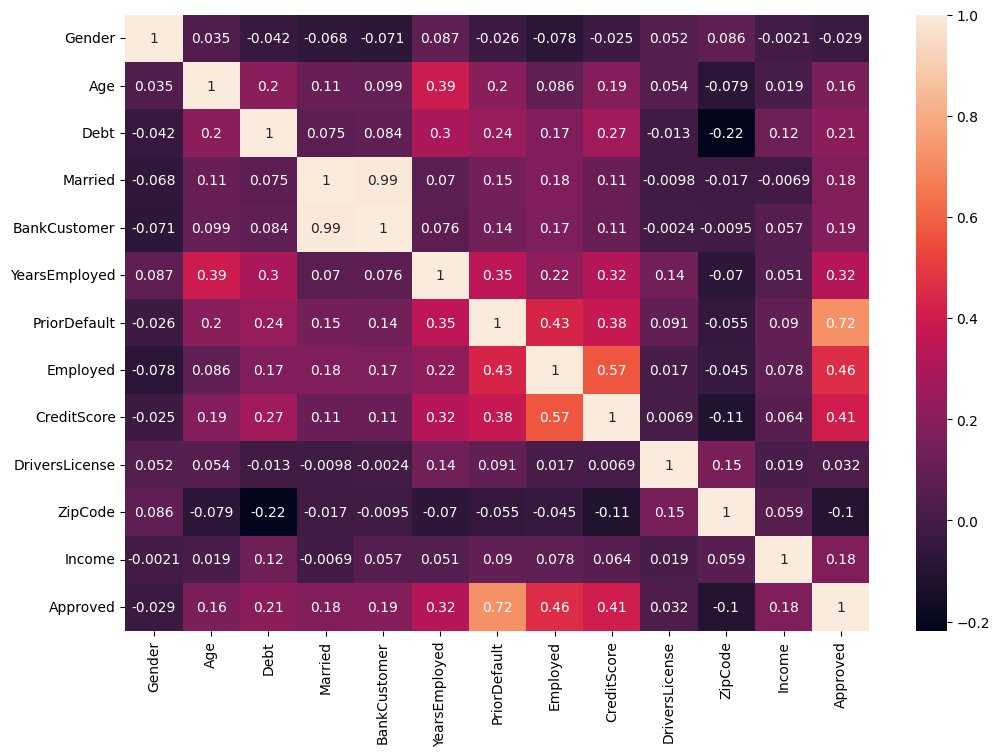

In [84]:
# How much do your employment status and years of employment influence the probability of getting a new credit card?
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy: 
0.5942028985507246


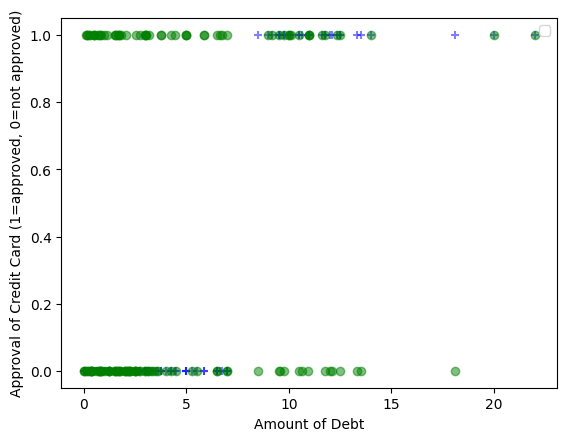

In [90]:
# Does the amount of debt the person owes affect the chance of getting a credit card?
from sklearn.linear_model import LogisticRegression
df_approval = df['Approved']
df_debt = df['Debt']
x_train, x_test, y_train, y_test = train_test_split(df_debt.values, df_approval.values, test_size=0.2, random_state=0)
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train.reshape(-1,1), y_train)
y_pred_debt = log_reg.predict(x_test.reshape(-1,1))
# plot the data
plt.scatter(x_test, y_pred_debt, color="b", alpha = 0.5, marker = '+')
plt.scatter(x_test, y_test, color='g', alpha = 0.5)
plt.xlabel("Amount of Debt")
plt.ylabel("Approval of Credit Card (1=approved, 0=not approved)")
plt.legend()
# predict accuracy
log_accuracy = log_reg.score(x_test.reshape(-1,1), y_test)
print('accuracy: ')
print(log_accuracy)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy: 
0.7753623188405797


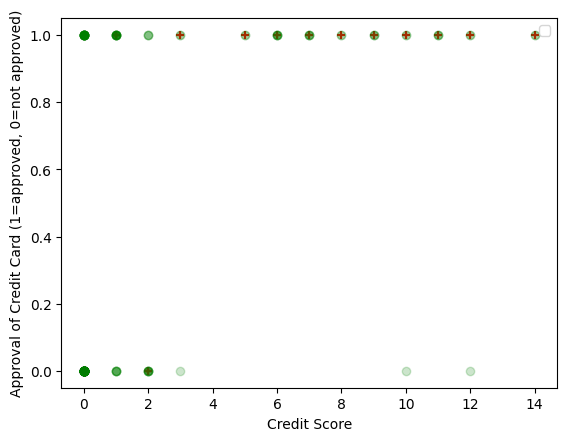

In [86]:
# How accurately can you predict approval of a credit card given the credit score a person owes?
from sklearn.neighbors import KNeighborsClassifier
df_approval = df['Approved']
df_credit_score = df['CreditScore']
x_train, x_test, y_train, y_test = train_test_split(df_credit_score.values, df_approval.values, test_size=0.2, random_state=0)
KNN = KNeighborsClassifier(n_neighbors = 10)
KNN.fit(x_train.reshape(-1,1), y_train)
y_pred_cs = KNN.predict(x_test.reshape(-1,1))
# plot the data
plt.scatter(x_test, y_pred_cs, color="r", alpha = 1, marker = '+')
plt.scatter(x_test, y_test, color='g', alpha = 0.2)
plt.xlabel("Credit Score")
plt.ylabel("Approval of Credit Card (1=approved, 0=not approved)")
plt.legend()
# accuracy
KNN_accuracy = KNN.score(x_test.reshape(-1,1), y_test)
print('accuracy: ')
print(KNN_accuracy)


correlation: 
[[1.         0.08905592]
 [0.08905592 1.        ]]


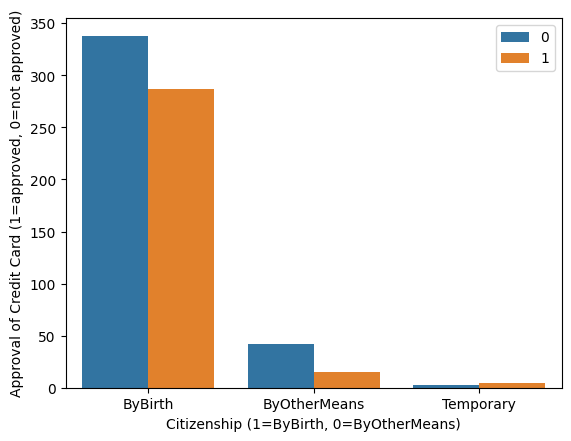

In [93]:
# Does the previous citizenship of the customer have any impact on their chance of a new credit card?
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
df_approval = df['Approved']
df_citizen = df['Citizen']
citizen_val_list = []
for i in range(0, len(df_citizen)):
    is_citizen = df_citizen.loc[i]
    if (is_citizen == "ByBirth"):
        citizen_val_list.append(1)
    else:
        citizen_val_list.append(0)
citizen_nparr = np.array(citizen_val_list)
citizen_corr = np.corrcoef(citizen_nparr, df_approval.values)
print('correlation: ')
print(citizen_corr)
# plot the data
sns.countplot(x='Citizen', hue='Approved', data=df)
plt.xlabel("Citizenship (1=ByBirth, 0=ByOtherMeans)")
plt.ylabel("Approval of Credit Card (1=approved, 0=not approved)")
plt.legend()

accuracy: 
0.855072463768116
cross validation score: 
[0.89285714 0.75       0.85714286 0.96296296 0.85185185]


<AxesSubplot:>

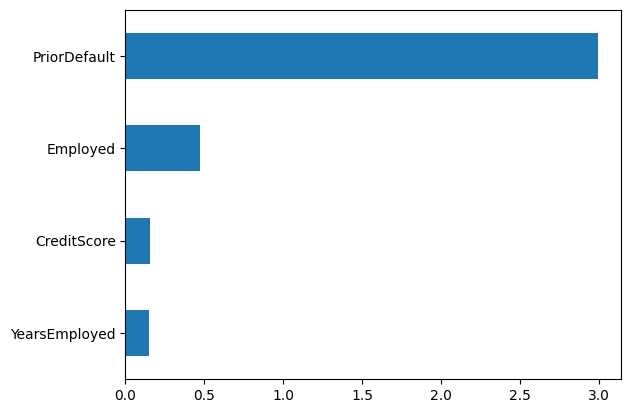

In [109]:
# training and testing a model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
Y = df.iloc[:, -1].values
X = df[["YearsEmployed", "PriorDefault", "Employed", "CreditScore"]].values
# split dataset into training, testing, and validation
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train)
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
# predict accuracy
log_accuracy = log_reg.score(x_test, y_test)
print('accuracy: ')
print(log_accuracy)
cross_validation = cross_val_score(log_reg, x_valid, y_valid)
print('cross validation score: ')
print(cross_validation)
# logsitic regressin coefficient
coeff = log_reg.coef_
columns = df[["YearsEmployed", "PriorDefault", "Employed", "CreditScore"]].columns
coefficient = pd.Series(coeff[0], columns)
coefficient.sort_values().plot.barh()
